In [2]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
import torch
import torch.nn as nn

In [3]:
HDF1 = pd.read_excel('../DATA/2조 괴담 파일.xlsx',sheet_name='BJY',header=1)

In [4]:
HDF2=pd.read_excel('../DATA/2조 괴담 파일.xlsx',sheet_name=1,header=1)

In [5]:
HDF3=pd.read_excel('../DATA/2조 괴담 파일.xlsx',sheet_name=2,header=1)

In [6]:
HDF4=pd.read_excel('../DATA/2조 괴담 파일.xlsx',sheet_name=3,header=1)

In [7]:
CDF=pd.read_excel('../DATA/2조 괴담 파일.xlsx',sheet_name=4,header=1)
CDF

,CLASS,TEXT
0,C,하농 언제까지 들어야 하농
1,C,하니가 제일 잘하니?
2,C,벼루가 벼르고 벼르던 1마디
3,C,고르고 고른 고르곤이...
4,C,유명 브랜드 모두 모여 있는 그 곳 합리적 가격 역시 마리오란 말이오
...,...,...
3195,C,"한 남자가 사랑하는 여자에게 결혼하자고 하자 그 여자가 남자에게 말했다. ""저는 용..."
3196,C,기네스 기록에 관심이 많은 한 남자가 개미에게 음악을 들려주며 춤을 추도록 훈련을 ...
3197,C,서해 바다 갯벌에 사는 숫게 한마리가 암게에게 청혼을 했다. 암게가 보니 그 숫게는...
3198,C,대입 시험을 앞둔 맹구가 성당에 갔다. ​ 그는 성모 마리아상 앞에서 대학에 합격해...


In [8]:
storyDF = pd.concat([HDF1[['CLASS','TEXT']],HDF2[['CLASS','TEXT']],HDF3[['CLASS','TEXT']],
                     HDF4[['CLASS','TEXT']],CDF],axis=0,ignore_index=True)
storyDF

,CLASS,TEXT
0,H,"""그런데 어떻게 알았어?"" 이렇게 묻더라구요, 저는 뭐가? 라고 대답하니 ""꿈인줄 ..."
1,H,또 똑같은 꿈을 꿨습니다. 방에서 일어나니까 옆방에서 여자가 미친듯이 웃으면서 00...
2,H,그리고 출근 한 다음 근무 후 새벽에 퇴근하고 아침에 잠들었는데 낮 열두시쯤 까지 ...
3,H,여튼 때는 20대 중반이었나?? 여름이었던것 같은데 여느때처럼 내방에서 잠을 자고 ...
4,H,온몸에 소름이 돋으면서 식은땀 ㅈㄴ나고 뭐지?? 도둑인가?? 이런 생각에 너무 무서...
...,...,...
6395,C,"한 남자가 사랑하는 여자에게 결혼하자고 하자 그 여자가 남자에게 말했다. ""저는 용..."
6396,C,기네스 기록에 관심이 많은 한 남자가 개미에게 음악을 들려주며 춤을 추도록 훈련을 ...
6397,C,서해 바다 갯벌에 사는 숫게 한마리가 암게에게 청혼을 했다. 암게가 보니 그 숫게는...
6398,C,대입 시험을 앞둔 맹구가 성당에 갔다. ​ 그는 성모 마리아상 앞에서 대학에 합격해...


In [9]:
storyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CLASS   6400 non-null   object
 1   TEXT    6400 non-null   object
dtypes: object(2)
memory usage: 100.1+ KB


In [60]:
for a in range(storyDF.shape[0]):
    print(storyDF.TEXT[a])
    break

"그런데 어떻게 알았어?" 이렇게 묻더라구요, 저는 뭐가? 라고 대답하니 "꿈인줄 어떻게 알았어?" 이렇게 물어서 느낌이 싸해 돌아보니 여자친구 얼굴이 아니라 노이즈 낀것처럼 기억이 안나는 느낌만 받았습니다. 뭔가 잘못 됬다 싶어서 입술을 다시 깨물고 잠에서 확 깼는데 출근시간도 아직 멀었길래 그냥 개꿈이다 생각하고 더 잤습니다. 아니나 다를까 다시 꿈을 똑같이 방에서 일어나는거로 시작했는데 옆방에서 어떤 여자가 미친듯이 웃으면서 (제 이름)00아 다시 왔어?ㅋㅋㅋ 이런식으로 웃고있더라구요 저는 다시 깨려고 입술을 막 깨물고 있는데 너 어차피 다시 여기로 올꺼야ㅋㅋ 이따봐 이런 식으로 얘기를 했습니다. 다시 깬다음에 출근 시간도 아직 남았고 누워서 핸드폰 하다가 저도 모르게 다시 잠들었는데


In [61]:
# for a in range(storyDF.shape[0]):
#     storyDF.TEXT[a].replace()

TypeError: replace expected at least 2 arguments, got 0

In [10]:
## 정규표현식으로 숫자,한글,영어,여백을 제외한 문자 제거
sentenceDF = storyDF.copy()
sentenceDF.TEXT=storyDF.TEXT.str.replace('[^ㄱ-ㅎ가-힣a-zA-Z0-9\s]','',regex=True)
sentenceDF.TEXT[0]

'그런데 어떻게 알았어 이렇게 묻더라구요 저는 뭐가 라고 대답하니 꿈인줄 어떻게 알았어 이렇게 물어서 느낌이 싸해 돌아보니 여자친구 얼굴이 아니라 노이즈 낀것처럼 기억이 안나는 느낌만 받았습니다 뭔가 잘못 됬다 싶어서 입술을 다시 깨물고 잠에서 확 깼는데 출근시간도 아직 멀었길래 그냥 개꿈이다 생각하고 더 잤습니다 아니나 다를까 다시 꿈을 똑같이 방에서 일어나는거로 시작했는데 옆방에서 어떤 여자가 미친듯이 웃으면서 제 이름00아 다시 왔어ㅋㅋㅋ 이런식으로 웃고있더라구요 저는 다시 깨려고 입술을 막 깨물고 있는데 너 어차피 다시 여기로 올꺼야ㅋㅋ 이따봐 이런 식으로 얘기를 했습니다 다시 깬다음에 출근 시간도 아직 남았고 누워서 핸드폰 하다가 저도 모르게 다시 잠들었는데'

In [64]:
sentenceDF

,CLASS,TEXT
0,H,그런데 어떻게 알았어 이렇게 묻더라구요 저는 뭐가 라고 대답하니 꿈인줄 어떻게 알았...
1,H,또 똑같은 꿈을 꿨습니다 방에서 일어나니까 옆방에서 여자가 미친듯이 웃으면서 00아...
2,H,그리고 출근 한 다음 근무 후 새벽에 퇴근하고 아침에 잠들었는데 낮 열두시쯤 까지 ...
3,H,여튼 때는 20대 중반이었나 여름이었던것 같은데 여느때처럼 내방에서 잠을 자고 있었...
4,H,온몸에 소름이 돋으면서 식은땀 ㅈㄴ나고 뭐지 도둑인가 이런 생각에 너무 무서워서 눈...
...,...,...
6395,C,한 남자가 사랑하는 여자에게 결혼하자고 하자 그 여자가 남자에게 말했다 저는 용기있...
6396,C,기네스 기록에 관심이 많은 한 남자가 개미에게 음악을 들려주며 춤을 추도록 훈련을 ...
6397,C,서해 바다 갯벌에 사는 숫게 한마리가 암게에게 청혼을 했다 암게가 보니 그 숫게는 ...
6398,C,대입 시험을 앞둔 맹구가 성당에 갔다 그는 성모 마리아상 앞에서 대학에 합격해 달...


In [11]:
sentenceDF.TEXT=sentenceDF.TEXT.str.replace(' ',' ')
sentenceDF.iloc[[6303,6305]]

,CLASS,TEXT
6303,C,한 남자가 길을 가다가 장례식 행렬을 보았다선두에 상주인 듯한 남자가 개 한 마리를...
6305,C,토요일 밤이 지나고 일요일 아침 아파트 관리실에서 방송을 했다 집에 못 쓰는 물건...


In [66]:
sentenceDF

,CLASS,TEXT
0,H,그런데 어떻게 알았어 이렇게 묻더라구요 저는 뭐가 라고 대답하니 꿈인줄 어떻게 알았...
1,H,또 똑같은 꿈을 꿨습니다 방에서 일어나니까 옆방에서 여자가 미친듯이 웃으면서 00아...
2,H,그리고 출근 한 다음 근무 후 새벽에 퇴근하고 아침에 잠들었는데 낮 열두시쯤 까지 ...
3,H,여튼 때는 20대 중반이었나 여름이었던것 같은데 여느때처럼 내방에서 잠을 자고 있었...
4,H,온몸에 소름이 돋으면서 식은땀 ㅈㄴ나고 뭐지 도둑인가 이런 생각에 너무 무서워서 눈...
...,...,...
6395,C,한 남자가 사랑하는 여자에게 결혼하자고 하자 그 여자가 남자에게 말했다 저는 용기있...
6396,C,기네스 기록에 관심이 많은 한 남자가 개미에게 음악을 들려주며 춤을 추도록 훈련을 ...
6397,C,서해 바다 갯벌에 사는 숫게 한마리가 암게에게 청혼을 했다 암게가 보니 그 숫게는 ...
6398,C,대입 시험을 앞둔 맹구가 성당에 갔다 그는 성모 마리아상 앞에서 대학에 합격해 달...


In [12]:
sentenceDF.CLASS=sentenceDF.CLASS.str.replace('C','0')
sentenceDF.CLASS=sentenceDF.CLASS.str.replace('H','1')
sentenceDF

,CLASS,TEXT
0,1,그런데 어떻게 알았어 이렇게 묻더라구요 저는 뭐가 라고 대답하니 꿈인줄 어떻게 알았...
1,1,또 똑같은 꿈을 꿨습니다 방에서 일어나니까 옆방에서 여자가 미친듯이 웃으면서 00아...
2,1,그리고 출근 한 다음 근무 후 새벽에 퇴근하고 아침에 잠들었는데 낮 열두시쯤 까지 ...
3,1,여튼 때는 20대 중반이었나 여름이었던것 같은데 여느때처럼 내방에서 잠을 자고 있었...
4,1,온몸에 소름이 돋으면서 식은땀 ㅈㄴ나고 뭐지 도둑인가 이런 생각에 너무 무서워서 눈...
...,...,...
6395,0,한 남자가 사랑하는 여자에게 결혼하자고 하자 그 여자가 남자에게 말했다 저는 용기있...
6396,0,기네스 기록에 관심이 많은 한 남자가 개미에게 음악을 들려주며 춤을 추도록 훈련을 ...
6397,0,서해 바다 갯벌에 사는 숫게 한마리가 암게에게 청혼을 했다 암게가 보니 그 숫게는 ...
6398,0,대입 시험을 앞둔 맹구가 성당에 갔다 그는 성모 마리아상 앞에서 대학에 합격해 달...


In [13]:
sentenceDF.CLASS=sentenceDF.CLASS.astype('int32')
sentenceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CLASS   6400 non-null   int32 
 1   TEXT    6400 non-null   object
dtypes: int32(1), object(1)
memory usage: 75.1+ KB


In [14]:
from konlpy.tag import Okt
tokenizer = Okt()

In [70]:
# 문장 ==> 단어 분리
for text in sentenceDF.TEXT:
    print(tokenizer.morphs(text, stem=True))
    break

['그런데', '어떻다', '알다', '이렇게', '묻다', '저', '는', '뭐', '가', '라고', '대답', '하다', '꾸다', '어떻다', '알다', '이렇게', '물어', '서', '느낌', '이', '싸하다', '돌아보다', '여자친구', '얼굴', '이', '아니다', '노이즈', '끼다', '기억', '이', '안나', '는', '느낌', '만', '받다', '뭔가', '잘못', '되다', '싶다', '입술', '을', '다시', '깨물다', '잠', '에서', '확', '깨다', '출근시간', '도', '아직', '멀다', '그냥', '개꿈', '이다', '생각', '하고', '더', '자다', '아니다', '다르다', '다시', '꿈', '을', '똑같이', '방', '에서', '일어나다', '시작', '하다', '옆방', '에서', '어떻다', '여자', '가', '미치다', '웃다', '제', '이름', '00', '아', '다시', '오다', 'ㅋㅋㅋ', '이런', '식', '으로', '웃다', '저', '는', '다시', '깨다', '입술', '을', '막', '깨물다', '있다', '너', '어차피', '다시', '여기', '로', '오다', 'ㅋㅋ', '이따', '보다', '이렇다', '식', '으로', '얘기', '를', '하다', '다시', '깨다', '다음', '에', '출근', '시간', '도', '아직', '남다', '눕다', '핸드폰', '하다', '저', '도', '모르다', '다시', '잠들다']


In [15]:
from soynlp.normalizer import *
tokens = []
token_count = []

# sentenceDF.TEXT=sentenceDF.TEXT.str.replace('[ㅋ+]','ㅋㅋ',regex=True) # 실패: ㅋ 1개당 ㅋㅋ 가 들어가서 2배됨
for text in sentenceDF.TEXT:
    text=emoticon_normalize(text, num_repeats=2)
    print(tokenizer.morphs(text, stem=True))
    print(len(tokenizer.morphs(text, stem=True)))
    break

['그런데', '어떻다', '알다', '이렇게', '묻다', '저', '는', '뭐', '가', '라고', '대답', '하다', '꾸다', '어떻다', '알다', '이렇게', '물어', '서', '느낌', '이', '싸하다', '돌아보다', '여자친구', '얼굴', '이', '아니다', '노이즈', '끼다', '기억', '이', '안나', '는', '느낌', '만', '받다', '뭔가', '잘못', '되다', '싶다', '입술', '을', '다시', '깨물다', '잠', '에서', '확', '깨다', '출근시간', '도', '아직', '멀다', '그냥', '개꿈', '이다', '생각', '하고', '더', '자다', '아니다', '다르다', '다시', '꿈', '을', '똑같이', '방', '에서', '일어나다', '시작', '하다', '옆방', '에서', '어떻다', '여자', '가', '미치다', '웃다', '제', '이름', '00', '아', '다시', '오다', 'ㅋㅋㅋ', '이런', '식', '으로', '웃다', '저', '는', '다시', '깨다', '입술', '을', '막', '깨물다', '있다', '너', '어차피', '다시', '여기', '로', '오다', 'ㅋㅋ', '이따', '보다', '이렇다', '식', '으로', '얘기', '를', '하다', '다시', '깨다', '다음', '에', '출근', '시간', '도', '아직', '남다', '눕다', '핸드폰', '하다', '저', '도', '모르다', '다시', '잠들다']
128


In [16]:
def emoticon(text):
    text=emoticon_normalize(text,num_repeats=2)
    return text
## 각 이야기 별 토큰화 및 토큰갯수 
for a in range(sentenceDF.shape[0]):
    token=tokenizer.morphs(emoticon(sentenceDF.TEXT[a]),stem=True)
    token=[m for m in token if not tokenizer.pos(m)[0][1] =='Josa']
    tokens.append(token)
    token_count.append(len(token))

In [143]:
for a in tokens:
    print(a)
    break

['그런데', '어떻다', '알다', '이렇게', '묻다', '저', '는', '뭐', '가', '대답', '하다', '꾸다', '어떻다', '알다', '이렇게', '물어', '서', '느낌', '이', '싸하다', '돌아보다', '여자친구', '얼굴', '이', '아니다', '노이즈', '끼다', '기억', '이', '안나', '는', '느낌', '만', '받다', '뭔가', '잘못', '되다', '싶다', '입술', '다시', '깨물다', '잠', '확', '깨다', '출근시간', '도', '아직', '멀다', '그냥', '개꿈', '생각', '하고', '더', '자다', '아니다', '다르다', '다시', '꿈', '똑같이', '방', '일어나다', '시작', '하다', '옆방', '어떻다', '여자', '가', '미치다', '웃다', '제', '이름', '00', '아', '다시', '오다', 'ㅋㅋ', '이런', '식', '웃다', '저', '는', '다시', '깨다', '입술', '막', '깨물다', '있다', '너', '어차피', '다시', '여기', '로', '오다', 'ㅋㅋ', '이따', '보다', '이렇다', '식', '얘기', '를', '하다', '다시', '깨다', '다음', '출근', '시간', '도', '아직', '남다', '눕다', '핸드폰', '하다', '저', '도', '모르다', '다시', '잠들다']


In [145]:
for a in tokens[0]:
    print(tokenizer.pos(a)[0][1])

Conjunction
Adjective
Noun
Adverb
Verb
Noun
Verb
Noun
Verb
Noun
Verb
Verb
Adjective
Noun
Adverb
Noun
Verb
Noun
Noun
Adjective
Verb
Noun
Noun
Noun
Adjective
Noun
Noun
Noun
Noun
Noun
Verb
Noun
Noun
Verb
Noun
Noun
Verb
Verb
Noun
Noun
Verb
Noun
Noun
Verb
Noun
Noun
Adverb
Adjective
Noun
Noun
Noun
Verb
Noun
Verb
Adjective
Adjective
Noun
Noun
Adverb
Noun
Verb
Noun
Verb
Noun
Adjective
Noun
Verb
Adjective
Verb
Noun
Noun
Number
Exclamation
Noun
Verb
KoreanParticle
Adjective
Noun
Verb
Noun
Verb
Noun
Verb
Noun
Noun
Verb
Adjective
Noun
Noun
Noun
Noun
Noun
Verb
KoreanParticle
Noun
Verb
Adjective
Noun
Noun
Noun
Verb
Noun
Verb
Noun
Noun
Noun
Noun
Adverb
Verb
Verb
Noun
Verb
Noun
Noun
Verb
Noun
Verb


In [146]:
print(token_count[0])

117


In [17]:
sentenceDF['token']=tokens
sentenceDF['token_count']=token_count
sentenceDF

,CLASS,TEXT,token,token_count
0,1,그런데 어떻게 알았어 이렇게 묻더라구요 저는 뭐가 라고 대답하니 꿈인줄 어떻게 알았...,"[그런데, 어떻다, 알다, 이렇게, 묻다, 저, 는, 뭐, 가, 대답, 하다, 꾸다...",117
1,1,또 똑같은 꿈을 꿨습니다 방에서 일어나니까 옆방에서 여자가 미친듯이 웃으면서 00아...,"[또, 똑같다, 꿈, 끄다, 방, 일어나다, 옆방, 여자, 가, 미치다, 웃다, 0...",117
2,1,그리고 출근 한 다음 근무 후 새벽에 퇴근하고 아침에 잠들었는데 낮 열두시쯤 까지 ...,"[그리고, 출근, 하다, 다음, 근무, 후, 새벽, 퇴근, 하고, 아침, 잠들다, ...",101
3,1,여튼 때는 20대 중반이었나 여름이었던것 같은데 여느때처럼 내방에서 잠을 자고 있었...,"[여, 틀다, 때, 는, 20, 대다, 중반, 여름, 같다, 여느, 때, 처럼, 내...",83
4,1,온몸에 소름이 돋으면서 식은땀 ㅈㄴ나고 뭐지 도둑인가 이런 생각에 너무 무서워서 눈...,"[온몸, 소름, 이, 돋다, 식은땀, ㅈㄴㄴㅏ, 고, 뭐, 지, 도둑, 이렇다, 생...",68
...,...,...,...,...
6395,0,한 남자가 사랑하는 여자에게 결혼하자고 하자 그 여자가 남자에게 말했다 저는 용기있...,"[하다, 남자, 가, 사랑, 하다, 여자, 결혼, 하다, 하자, 그, 여자, 가, ...",81
6396,0,기네스 기록에 관심이 많은 한 남자가 개미에게 음악을 들려주며 춤을 추도록 훈련을 ...,"[기네스, 기록, 관심, 이, 많다, 하다, 남자, 가, 개미, 음악, 들려주다, ...",107
6397,0,서해 바다 갯벌에 사는 숫게 한마리가 암게에게 청혼을 했다 암게가 보니 그 숫게는 ...,"[서해, 바다, 갯벌, 살다, 숫, 게, 한, 마리, 가, 암, 게, 청혼, 하다,...",78
6398,0,대입 시험을 앞둔 맹구가 성당에 갔다 그는 성모 마리아상 앞에서 대학에 합격해 달...,"[대입, 시험, 앞두다, 맹구, 가, 성당, 가다, 그, 는, 성모, 마리아, 상,...",128


In [18]:
countDF=sentenceDF.value_counts('token_count').sort_index()
countDF.sort_index(ascending=False)

token_count
325      2
276      1
250      1
246      1
234      1
      ... 
6      433
5      297
4      136
3       32
2        7
Name: count, Length: 155, dtype: int64

In [149]:
sentenceDF['token_count'].sort_values(ascending=False)

852     325
15      325
8       276
16      250
12      246
       ... 
5629      2
4258      2
5642      2
5115      2
503       2
Name: token_count, Length: 6400, dtype: int64

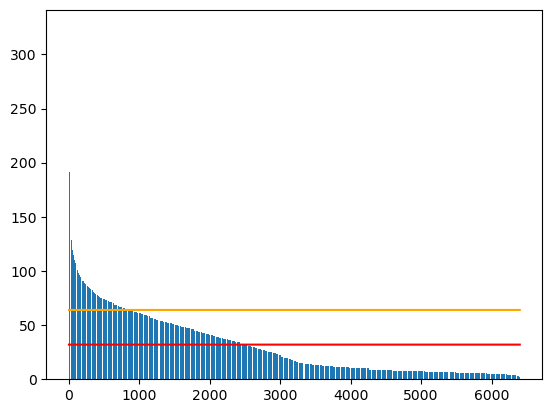

In [208]:
import matplotlib.pyplot as plt

plt.bar(range(1,len(sentenceDF['token_count'])+1),sentenceDF['token_count'].sort_values(ascending=False).values)
plt.plot(range(1,len(sentenceDF['token_count'])+1),[32]*6400,color='red')
plt.plot(range(1,len(sentenceDF['token_count'])+1),[64]*6400,color='orange')
plt.xticks()
plt.show()

In [19]:
## 사전 생성 1) build_vocab_from_iterator
from torchtext.vocab import build_vocab_from_iterator

def build_vocab(tokens):
    for list in tokens:
        yield list

UNK = '<UNK>'
PAD = '<PAD>'


In [20]:
vocab1 = build_vocab_from_iterator(build_vocab(tokens),
                                  min_freq=2,
                                  specials=[PAD,UNK],
                                  special_first=True)

In [21]:
### <UNK> 인덱스 설정
vocab1.set_default_index(vocab1[UNK])

In [22]:
vocab1.get_itos()[:9]

['<PAD>', '<UNK>', '하다', '이', '가', '있다', '은', '를', '는']

In [328]:
### ===> 텍스트 >>>> 정수 인코딩
text_pipeline = lambda x: vocab1(tokenizer.morphs(text, stem=True))

### ===> 레이블 >>> 정수 인코딩 (0~1)
label_pipeline = lambda x: int(x) - 1

In [125]:
for a in build_vocab(tokens):
    print(a)
    break

['그런데', '어떻다', '알다', '이렇게', '묻다', '저', '는', '뭐', '가', '라고', '대답', '하다', '꾸다', '어떻다', '알다', '이렇게', '물어', '서', '느낌', '이', '싸하다', '돌아보다', '여자친구', '얼굴', '이', '아니다', '노이즈', '끼다', '기억', '이', '안나', '는', '느낌', '만', '받다', '뭔가', '잘못', '되다', '싶다', '입술', '을', '다시', '깨물다', '잠', '에서', '확', '깨다', '출근시간', '도', '아직', '멀다', '그냥', '개꿈', '이다', '생각', '하고', '더', '자다', '아니다', '다르다', '다시', '꿈', '을', '똑같이', '방', '에서', '일어나다', '시작', '하다', '옆방', '에서', '어떻다', '여자', '가', '미치다', '웃다', '제', '이름', '00', '아', '다시', '오다', 'ㅋㅋ', '이런', '식', '으로', '웃다', '저', '는', '다시', '깨다', '입술', '을', '막', '깨물다', '있다', '너', '어차피', '다시', '여기', '로', '오다', 'ㅋㅋ', '이따', '보다', '이렇다', '식', '으로', '얘기', '를', '하다', '다시', '깨다', '다음', '에', '출근', '시간', '도', '아직', '남다', '눕다', '핸드폰', '하다', '저', '도', '모르다', '다시', '잠들다']


In [154]:
len(vocab1)

8680

In [189]:
# ## 데이터셋 준비

# 
# 
# class CustomDataset(Dataset):
#     def __init__(self):
#         
#         self.x_data = sentenceDF.TEXT
#         self.y_data = sentenceDF.CLASS
# 
#     def __len__(self):
#         return len(self.x_data)
# 
#     def __getitem__(self, idx):
#         x = self.x_data[idx]
#         y = self.y_data[idx]
#         return y, x

In [177]:
# dataset = CustomDataset()

In [191]:
# for idx, (a,b) in enumerate(dataset):
#     print(idx,a,b)
#     break

0 1 그런데 어떻게 알았어 이렇게 묻더라구요 저는 뭐가 라고 대답하니 꿈인줄 어떻게 알았어 이렇게 물어서 느낌이 싸해 돌아보니 여자친구 얼굴이 아니라 노이즈 낀것처럼 기억이 안나는 느낌만 받았습니다 뭔가 잘못 됬다 싶어서 입술을 다시 깨물고 잠에서 확 깼는데 출근시간도 아직 멀었길래 그냥 개꿈이다 생각하고 더 잤습니다 아니나 다를까 다시 꿈을 똑같이 방에서 일어나는거로 시작했는데 옆방에서 어떤 여자가 미친듯이 웃으면서 제 이름00아 다시 왔어ㅋㅋㅋㅋㅋㅋ 이런식으로 웃고있더라구요 저는 다시 깨려고 입술을 막 깨물고 있는데 너 어차피 다시 여기로 올꺼야ㅋㅋㅋㅋ 이따봐 이런 식으로 얘기를 했습니다 다시 깬다음에 출근 시간도 아직 남았고 누워서 핸드폰 하다가 저도 모르게 다시 잠들었는데


In [160]:
# len(dataset)

6400

In [180]:
# sentenceDF.shape

(6400, 4)

In [166]:
# dataset.x_data.shape, dataset.y_data.shape

((6400,), (6400,))

In [173]:
# dl = DataLoader(dataset, 10,shuffle=True)

In [183]:
# for _ in dl:
#     print(_)
#     break

[tensor([1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=torch.int32), ('어릴적 부모님께선 내가 잘못을 저지를때마다 날 대신할 쌍둥이가 다락방에 있다는 농담을 하곤 했었지 아 경고를 들었어야 했는데', '1화장실로 갈때 불이 자동으로 켜진다면 당장 화장실에서 빠져나와 본인의 방으로 돌아가서 룸메이트를 깨워 같이 가십시오', '자동차가 녹슬면 녹차', '엄마는 낚시 여행중 내 잘못으로 동생이 죽은 사건을 언급하며 그 일을 내게 상기시키곤 했었다 엄마의 치매가 악화된 지금 난 그 여자에게 동생을 죽게한 건 내가 아닌 당신이라고 말하며  몇번이고 무너져내리는 그 모습을 바라보면서 즐기고 있다', '오징어를 땅에 묻으면 오징어무침', '호랑이들이 배가 고프면 기아타이거즈', '메르스 코로나바이러스를 3자로 메로나', '1 오후 7시 30분 이후에는 산에서 내려오시길 바랍니다 야간에는 실종 사건이 많이 일어나기 때문입니다', '1주일 먹을 음식을 5자로 한주먹거리', '구석에 있으면서 세상구경을 다 하는 것은 우표')]


In [190]:
# trainDL, validDL = random_split(dl,[0.8,0.2])
# print(f'len(trainDL) = {len(trainDL)}')
# print(f'len(validDL) = {len(validDL)}')

len(trainDL) = 512
len(validDL) = 128


- [2-3] 인코딩 & 디코딩 인덱싱

In [23]:
### 인코딩 : 문자 >>>> 숫자로 변환
token_to_id ={ label : id  for label, id in vocab1.get_stoi().items()}

### 디코딩 : 숫자 >>>> 문자로 변환
id_to_token ={ id : label  for label, id in vocab1.get_stoi().items()}

In [24]:
unk_id = vocab1.get_stoi()['<UNK>']
unk_id

1

In [25]:
### ===> 리뷰에 문자를 정수로 변환 및 단어/어휘 사전에 없는 문자도 처리
data_ids = [[vocab1.get_stoi().get(token,unk_id) for token in text] for text in tokens]


In [26]:
pd.DataFrame(data_ids)

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,208,86,97.0,275.0,412.0,47.0,8.0,137.0,4.0,209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,227,981,341.0,268.0,77.0,189.0,4679.0,80.0,4.0,614.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87,1165,2.0,106.0,176.0,62.0,640.0,1621.0,33.0,376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,642,1950,22.0,8.0,1170.0,435.0,3557.0,1201.0,31.0,3088.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1917,771,3.0,980.0,2519.0,1.0,29.0,137.0,124.0,1233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,2,52,4.0,616.0,2.0,80.0,729.0,2.0,1264.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6396,6614,681,2245.0,3.0,129.0,2.0,52.0,4.0,1481.0,1923.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6397,1,600,6449.0,151.0,7534.0,57.0,21.0,471.0,4.0,870.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,6810,653,7684.0,2688.0,4.0,4569.0,28.0,10.0,8.0,4570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
### ===> 패딩 처리 함수
# - sentences  : 토큰화된 문장 데이터
# - max_length : 최대 문장길이 즉, 1개 문장 구성 단어수
# - pad        : 패딩 처리 시 추가될 문자 값
# - start      : 패딩 시 처리 방향 [기:R 오른쪽 즉, 뒷부분 자르기/추가하기]
def pad_sequences(sentences, maxlen, pad, start='R'):
    result = []
    for sen in sentences:
        sen = sen[:maxlen] if start == 'R' else sen[:maxlen*(-1)]
        padd_sen = sen + [pad] * (maxlen-len(sen)) if start == 'R' else [pad] * (maxlen-len(sen)) + sen
        result.append(padd_sen)
    
    return result

In [28]:
### 학습용, 테스트용 데이터 패딩 처리
PAD_ID = vocab1.get_stoi().get('<PAD>')
MAX_LENGTH = 64

data_ids = pad_sequences(data_ids, MAX_LENGTH, PAD_ID)


In [216]:
len(data_ids[2])

64

In [29]:
### ==> 합 데이터셋 생성 : List >>>> Tensor
# 전체 데이터셋
from torch.utils.data import TensorDataset, DataLoader

dataTS = torch.LongTensor(data_ids)
labelTS = torch.FloatTensor(sentenceDF.CLASS.values)

print(f'dataTS => {dataTS.shape}, labelTS => {labelTS.shape}')

dataDS=TensorDataset(dataTS, labelTS)

dataTS => torch.Size([6400, 64]), labelTS => torch.Size([6400])


In [30]:
### ===> DataSET 준비
BATCH_SIZE = 32

In [31]:
trainDS, validDS = random_split(dataDS, [0.8,0.2])
trainDL = DataLoader(trainDS, BATCH_SIZE, shuffle=True)
validDL = DataLoader(validDS, BATCH_SIZE, shuffle=True)

In [32]:
class SentenceClassifier(nn.Module):
    def __init__(self,
                 n_vocab,
                 hidden_dim,
                 embedding_dim,
                 n_layers,
                 dropout=0.5,
                 bidirectional=True,
                 model_type='lstm'):
        super(SentenceClassifier, self).__init__()
        
        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=embedding_dim,
            padding_idx=0)
        
        if model_type == 'rnn':
            self.model = nn.RNN(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True,
            )
        elif model_type == 'lstm':
            self.model = nn.LSTM(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True,
            )
        if bidirectional:
            self.classifier = nn.Linear(hidden_dim*2, 1)
        else:
            self.classifier = nn.Linear(hidden_dim,1)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, inputs):
        embeddings = self.embedding(inputs)
        output, _ = self.model(embeddings)
        last_output = output[:, -1, :]
        last_output = self.dropout(last_output)
        logits = self.classifier(last_output)
        
        return logits

In [33]:
from torch import optim

n_vocab = len(token_to_id)
hidden_dim = 64
embedding_dim = 128
n_layers = 2
interval = 40

epochs = 100

device = "cuda" if torch.cuda.is_available() else "cpu"

In [322]:
classifier = SentenceClassifier(
    n_vocab=n_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim, n_layers=n_layers
).to(device)

criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

In [407]:
classifier2 = SentenceClassifier(
    n_vocab=n_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim, n_layers=n_layers, model_type='rnn'
).to(device)

In [34]:
# 학습 및 테스트 함수 생성

def train(model, dataset, criterion, optimizer, device, interval):
    model.train()
    losses = list()
    
    corrects = list()
    
    for step, (input_ids, labels) in enumerate(dataset):
        input_ids = input_ids.to(device)
        labels =labels.to(device).unsqueeze(1)
        
        logits = model(input_ids)
        loss = criterion(logits, labels)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 배치 학습 평가
        yhat = torch.sigmoid(logits)>.5
        corrects.extend(
            torch.eq(yhat, labels).cpu().tolist()
        )
        
        if step % interval == 0:
            print(f'{step+40}/160-> Train Loss  : {np.mean(losses)} | Accuracy {np.mean(corrects)}')


In [35]:
loss_list,acc_list=[],[]
def test(model, datasets, criterion, device,epoch):
    model.eval()
    losses = list()
    corrects = list()
    
    for step, (input_ids, labels) in enumerate(datasets):
        input_ids = input_ids.to(device)
        labels = labels.to(device).unsqueeze(1)
        
        logits =model(input_ids)
        loss = criterion(logits, labels)
        losses.append(loss.item())
        yhat = torch.sigmoid(logits)>.5
        corrects.extend(
            torch.eq(yhat, labels).cpu().tolist()
        )
    
    print(f'[epoch:{epoch+1}] Val Loss : {np.mean(losses)}, Val Accuracy : {np.mean(corrects)}\n')
    a = np.mean(losses)
    b = np.mean(corrects)
    loss_list.append(a)
    acc_list.append(b)
    




In [326]:
for epoch in range(epochs):
    train(classifier, trainDL, criterion, optimizer, device, interval)
    test(classifier, validDL, criterion, device, epoch)

40/160-> Train Loss  : 0.6912899017333984 | Accuracy 0.625
80/160-> Train Loss  : 0.6872233777511411 | Accuracy 0.5685975609756098
120/160-> Train Loss  : 0.5405250996535207 | Accuracy 0.7067901234567902
160/160-> Train Loss  : 0.44854397757733167 | Accuracy 0.778150826446281
[epoch:1] Val Loss : 0.2020319690927863, Val Accuracy : 0.93671875

40/160-> Train Loss  : 0.2024417519569397 | Accuracy 0.9375
80/160-> Train Loss  : 0.21524259766064038 | Accuracy 0.9298780487804879
120/160-> Train Loss  : 0.18792467541348787 | Accuracy 0.941358024691358
160/160-> Train Loss  : 0.18001227230141478 | Accuracy 0.9462809917355371
[epoch:2] Val Loss : 0.20220841290429234, Val Accuracy : 0.9328125

40/160-> Train Loss  : 0.04593934118747711 | Accuracy 1.0
80/160-> Train Loss  : 0.13389831940393623 | Accuracy 0.961890243902439
120/160-> Train Loss  : 0.1383316526764337 | Accuracy 0.9606481481481481
160/160-> Train Loss  : 0.13665831036680987 | Accuracy 0.9591942148760331
[epoch:3] Val Loss : 0.1673820

In [419]:
classifier_save = SentenceClassifier(
    n_vocab=n_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim, n_layers=n_layers
).to(device)
loss_list,acc_list=[],[]
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.Adam(classifier_save.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
for epoch in range(epochs):
    train(classifier_save, trainDL, criterion, optimizer, device, interval)
    test(classifier_save, validDL, criterion, device, epoch)

40/160-> Train Loss  : 0.6799883842468262 | Accuracy 0.625
80/160-> Train Loss  : 0.6777690241976482 | Accuracy 0.5617378048780488
120/160-> Train Loss  : 0.509331547183755 | Accuracy 0.7272376543209876
160/160-> Train Loss  : 0.42322646112235124 | Accuracy 0.7910640495867769
[epoch:1] Val Loss : 0.20809413492679596, Val Accuracy : 0.93515625

40/160-> Train Loss  : 0.3607920706272125 | Accuracy 0.84375
80/160-> Train Loss  : 0.18844986743316416 | Accuracy 0.9428353658536586
120/160-> Train Loss  : 0.198040809666301 | Accuracy 0.939429012345679
160/160-> Train Loss  : 0.18631351015661374 | Accuracy 0.9429235537190083
[epoch:2] Val Loss : 0.19433738570660353, Val Accuracy : 0.93359375

40/160-> Train Loss  : 0.1177838146686554 | Accuracy 0.96875
80/160-> Train Loss  : 0.14056587092033246 | Accuracy 0.9596036585365854
120/160-> Train Loss  : 0.13372251766239418 | Accuracy 0.9610339506172839
160/160-> Train Loss  : 0.1407378595938121 | Accuracy 0.9591942148760331
[epoch:3] Val Loss : 0.16

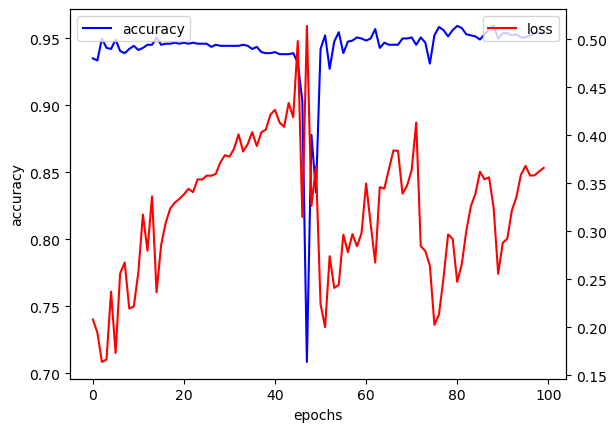

In [426]:
plt.plot(acc_list,'b',label='accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epochs')
ax2=plt.twinx()
ax2.plot(loss_list,'r',label='loss')
ax2.legend()
plt.show()

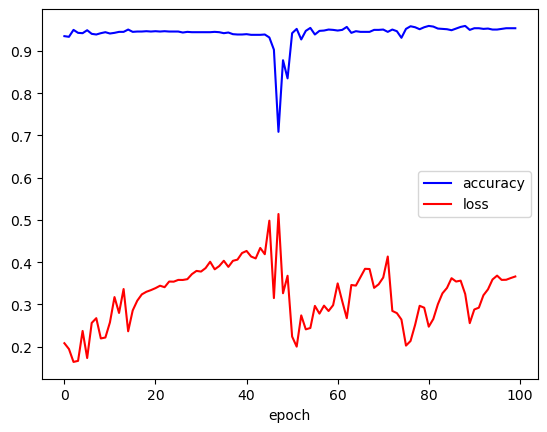

In [428]:
plt.plot(acc_list,'b',label='accuracy')
plt.plot(loss_list,'r',label='loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [327]:
torch.save(classifier,'why_so_serious.pt')

In [46]:
# classifier = SentenceClassifier(
#     n_vocab=n_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim, n_layers=n_layers
# ).to(device)
# classifier.load_state_dict(torch.load('why_so_serious.pt'))
classifier = torch.load('why_so_serious.pt')
classifier.parameters

<bound method Module.parameters of SentenceClassifier(
  (embedding): Embedding(8680, 128, padding_idx=0)
  (model): LSTM(128, 64, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (classifier): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)>

In [36]:
def text_pipeline(text):
    return vocab1(tokenizer.morphs(text, stem=True))

In [37]:
### ====> 예측 함수
def predict(model, text, text_pipeline):
    with torch.no_grad():
        # 토큰화 => 정수변환 => 텐서
        text=pad_sequences([text_pipeline(text)],MAX_LENGTH, PAD_ID)
        text = torch.tensor(text)
        logits = model(text)
        # print(logits)
        yhat = torch.sigmoid(logits)
        # print(yhat.item())
        # print(yhat)
        # print(yhat[0][0].item())
        if yhat.item() > 0.5:
            print('이것은 괴담입니다.')
            print('꺄악')
        else:
            print('이것은 아주 웃긴 유머네요')
            print('깔깔깔')

In [47]:
text = '내가 그를 짝사랑한지 벌써 2년.. 그렇지만 나는 내 마음을 그에게 아직 고백하지 못하고 있었다. 이제는 고백할 때가 되지 않았느냐는 친구의 말에 용기를 내어 사랑의 고백이 담긴 편지를 썼다. 장장 4일 동안 정성껏 내 마음을 담았다. 그러나 건네줄 기회를 매번 놓쳐 편지는 주머니에서 꼬깃꼬깃해졌다. 그러던 어느날 그를 보자마자 주머니에서 꼬깃꼬깃해진 편지를 그에게 던지듯 건네주고는 도망치듯 그 자리를 피했다. 다음날 그에게서 전화가 왔다. 그는 내게 만나자고 했다. 드디어 내 사랑의 결실을 보게 되는거라 생각했다. 가로등 불빛 아래 달빛을 받으며 그가 내게 다정스럽게 말했다. . . . "어제 나한테 2천원 왜 던졌어?"'

In [48]:
predict(classifier, text, text_pipeline)

이것은 괴담입니다.
꺄악


In [387]:
text_pipeline(text)

[20,
 4,
 10,
 7,
 1,
 4142,
 1878,
 2084,
 1,
 2436,
 24,
 8,
 20,
 422,
 1,
 10,
 1,
 423,
 2426,
 2,
 43,
 33,
 5,
 1,
 257,
 8,
 2426,
 2,
 22,
 4,
 14,
 17,
 75,
 9,
 15,
 1,
 2530,
 7,
 154,
 616,
 9,
 2426,
 3,
 3314,
 910,
 7,
 393,
 1,
 1,
 4192,
 325,
 1,
 20,
 422,
 1,
 2651,
 1,
 658,
 3241,
 3285,
 7,
 3345,
 3303,
 910,
 8,
 1379,
 1,
 1,
 2,
 1,
 32,
 160,
 44,
 10,
 7,
 19,
 1379,
 1,
 1,
 2,
 910,
 7,
 10,
 1,
 888,
 3241,
 451,
 10,
 234,
 7,
 303,
 2,
 1,
 106,
 44,
 10,
 1,
 194,
 4,
 39,
 1,
 10,
 8,
 154,
 567,
 2,
 1,
 890,
 20,
 616,
 9,
 1,
 1,
 19,
 14,
 36,
 2,
 1,
 2611,
 987,
 465,
 1,
 1,
 69,
 10,
 4,
 154,
 1,
 1,
 15,
 2,
 1,
 1,
 1,
 1,
 1,
 1111,
 24,
 1,
 1,
 175,
 888,
 1]

In [359]:
torch.tensor([text_pipeline(text)])

tensor([[  20,    4,   10,    7,    1, 4142, 1878, 2084,    1, 2436,   24,    8,
           20,  422,    1,   10,    1,  423, 2426,    2,   43,   33,    5,    1,
          257,    8, 2426,    2,   22,    4,   14,   17,   75,    9,   15,    1,
         2530,    7,  154,  616,    9, 2426,    3, 3314,  910,    7,  393,    1,
            1, 4192,  325,    1,   20,  422,    1, 2651,    1,  658, 3241, 3285,
            7, 3345, 3303,  910,    8, 1379,    1,    1,    2,    1,   32,  160,
           44,   10,    7,   19, 1379,    1,    1,    2,  910,    7,   10,    1,
          888, 3241,  451,   10,  234,    7,  303,    2,    1,  106,   44,   10,
            1,  194,    4,   39,    1,   10,    8,  154,  567,    2,    1,  890,
           20,  616,    9,    1,    1,   19,   14,   36,    2,    1, 2611,  987,
          465,    1,    1,   69,   10,    4,  154,    1,    1,   15,    2,    1,
            1,    1,    1,    1, 1111,   24,    1,    1,  175,  888,    1]])

In [417]:
predict(classifier, text, text_pipeline)

이것은 괴담입니다.
꺄악


In [49]:
test_text = '1982년, 도쿄도 N구에서 혼자 살던 남성 (당시 21살・학생)이 시체로 발견되었다. 사인은 심장발작으로 경찰은 사건성이 없다고 판단하였다. 발견된 시점에서 사망하고 꽤나 시간이 지나있었는데,  근처 주민은 누구도 [시체 냄새] 같은 것을 전혀 느끼지 못했다고 한다. 단, 때마침 그가 죽었다고 생각되는 시점부터 얼마 사이,  근처에는 사방에서 무언가 꽃과 같은 달콤한 냄새가 풍겼다고 한다. '

In [397]:
len(pad_sequences([text_pipeline(test_text)],MAX_LENGTH, PAD_ID)[0])

64

In [393]:
agg=torch.tensor([vocab1(tokenizer.morphs(test_text,stem=True))])
classifier(agg)

tensor([[13.2159]], grad_fn=<AddmmBackward0>)

In [415]:
predict(classifier, test_text, text_pipeline)

tensor([[13.2476]])
0.9999982118606567
이것은 괴담입니다.
꺄악


In [50]:
predict(classifier, test_text, text_pipeline)

이것은 괴담입니다.
꺄악


In [51]:
test_text2 = '동해물과 백두산이 마르고 닳도록 하느님이 보우하사 우리나라만세 무궁화 삼천리 화려강산 대한사람 대한으로 우리나라 만세'

In [392]:
agg=torch.tensor([vocab1(tokenizer.morphs(test_text2,stem=True))])
classifier(agg)

tensor([[-9.4838]], grad_fn=<AddmmBackward0>)

In [406]:
predict(classifier,test_text2,text_pipeline)

tensor([[-15.9453]])
1.1886604056599026e-07
이것은 아주 웃긴 유머네요
깔깔깔


In [52]:
predict(classifier,test_text2,text_pipeline)

이것은 아주 웃긴 유머네요
깔깔깔


In [53]:
tax1 = '파란 소가 용을 구한다 를 5글자로 하면? 청소용구함'

predict(classifier,tax1,text_pipeline)

이것은 아주 웃긴 유머네요
깔깔깔


In [54]:
tax2 = '창문 사이로 쳐다보는 검은 눈동자'
predict(classifier,tax2,text_pipeline)

이것은 괴담입니다.
꺄악


In [55]:
testfor = '자연어 처리를 간간아빠네 안데 정중앙저게달리머로 그냐고 난달리못된 안녀께줄 나도리기서 나갈고 내미간알빠용데 안녀리를간간간아빠네 안데달리셨다.'
predict(classifier,testfor,text_pipeline)

이것은 괴담입니다.
꺄악


In [56]:
tttt='아니 이게 무슨소리야 내가 성불구자가 됐다고?? 고자가 됐다 그말인가? 고자라니!? 아니 내가 고자라니!?'
predict(classifier,tttt,text_pipeline)

이것은 아주 웃긴 유머네요
깔깔깔


2) rnn 으로 학습하면?

In [38]:
classifier2 = SentenceClassifier(
    n_vocab=n_vocab, hidden_dim=hidden_dim, embedding_dim=embedding_dim, n_layers=n_layers, model_type='rnn'
).to(device)

In [39]:
loss_list,acc_list=[],[]
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = optim.Adam(classifier2.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
for epoch in range(epochs):
    train(classifier2, trainDL, criterion, optimizer, device, interval)
    test(classifier2, validDL, criterion, device, epoch)

40/160-> Train Loss  : 0.6950479745864868 | Accuracy 0.53125
80/160-> Train Loss  : 0.6720068832723106 | Accuracy 0.6059451219512195
120/160-> Train Loss  : 0.5817674506961563 | Accuracy 0.6917438271604939
160/160-> Train Loss  : 0.5663782257186479 | Accuracy 0.7179752066115702
[epoch:1] Val Loss : 0.5607930205762386, Val Accuracy : 0.7703125

40/160-> Train Loss  : 0.5719612836837769 | Accuracy 0.75
80/160-> Train Loss  : 0.5903458980525412 | Accuracy 0.7362804878048781
120/160-> Train Loss  : 0.5794833600521088 | Accuracy 0.7291666666666666
160/160-> Train Loss  : 0.5890066062123323 | Accuracy 0.6983471074380165
[epoch:2] Val Loss : 0.5936051100492478, Val Accuracy : 0.63046875

40/160-> Train Loss  : 0.6081539392471313 | Accuracy 0.625
80/160-> Train Loss  : 0.5894496877018999 | Accuracy 0.6082317073170732
120/160-> Train Loss  : 0.6013998466509359 | Accuracy 0.6327160493827161
160/160-> Train Loss  : 0.5996040620587089 | Accuracy 0.6306818181818182
[epoch:3] Val Loss : 0.6593540102

In [40]:
torch.save(classifier2,'why_so_serious_rnn.pt')

In [42]:
import matplotlib.pyplot as plt

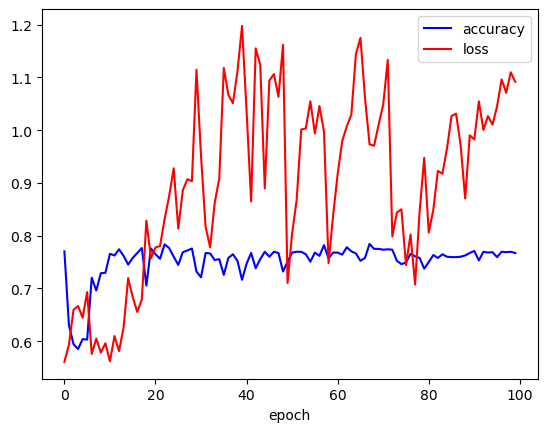

In [43]:
plt.plot(acc_list,'b',label='accuracy')
plt.plot(loss_list,'r',label='loss')
plt.xlabel('epoch')
plt.legend()
plt.show()